<a href="https://colab.research.google.com/github/svhenrique/ufal/blob/main/PI/AB1/AV1b/PI_Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import math
from matplotlib import pyplot as plt

## Testando abertura de imagem

In [3]:
image_path = "/content/drive/My Drive/UFAL/PI/ImagensParaProcessamento/"

uint8


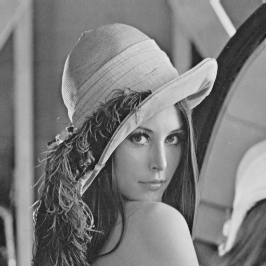

In [4]:
image = cv.cvtColor(io.imread(image_path + "Lenna.png"), cv.COLOR_RGBA2GRAY)
print(image.dtype)
cv2_imshow(cv.resize(image, None, fx=.52, fy=.52))

## Transformada de Fourier


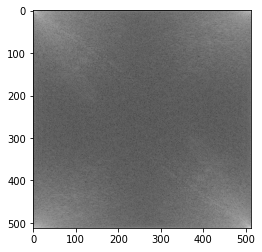

In [5]:
# Utilizando função numpy fft2, relativa a transformada de fourier,
# na imagem Lenna

image_fft = np.fft.fft2(image)
plt.imshow(np.log(1+np.abs(image_fft)), cmap="gray")
plt.show()

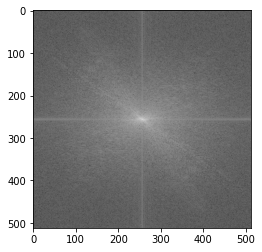

In [6]:
# utilizando shift para centralizar as frequências mais baixas 
# as frequências mais altas são afastadas do centro.
image_fft_shift = np.fft.fftshift(image_fft)

plt.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
plt.show()

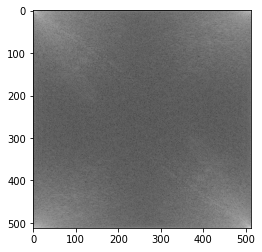

In [7]:
# mostrando aplicação de shift inverso no shitft 
# resultado é o mesmo da primeira aplicação de transformada de fourrier 
# na imagem lenna

image_fft_shift_inverso = np.fft.ifftshift(image_fft_shift)

plt.imshow(np.log(1+np.abs(image_fft_shift_inverso)), cmap="gray")
plt.show()

## Filtros para o trabalho

In [8]:
# Distancia Euclidiana

def distance(point_1,point_2):
    from math import sqrt
    return sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)

### Filtro passa alta Gaussiano

In [9]:
# Filtro passa alta Gaussiano

def passa_alta_gaussiano(D_0, imgageShape):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.e**((-(distance((y,x), center)**2))/(2*(D_0**2)))
    return base

#### Testando filtro

##### D_0 = 50

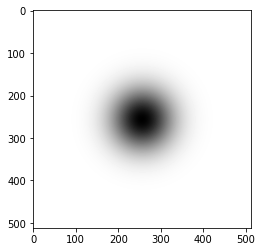

In [38]:
# testando filtro com D_0 = 50
HighPass_GAU = passa_alta_gaussiano(50, image.shape)
plt.imshow(np.abs(HighPass_GAU), "gray")

plt.show()

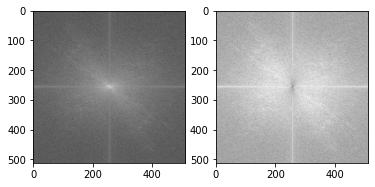

In [39]:
# aplicando filtro em transformada da imagem lenna

HighPassGauCenter = image_fft_shift * HighPass_GAU

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassGauCenter)), cmap="gray")

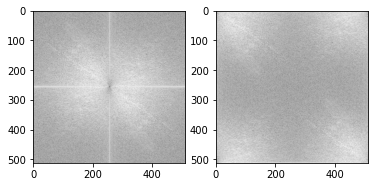

In [40]:
# fazendo o shift inverso com o filtro aplicado na imagem 

HighPassGau_shift_inverse = np.fft.ifftshift(HighPassGauCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassGauCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassGau_shift_inverse)), cmap="gray")

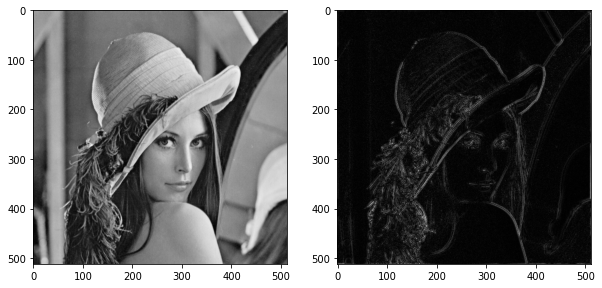

In [41]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_HighPassGau = np.fft.ifft2(HighPassGau_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPassGau), cmap="gray")

##### D_0 = 100

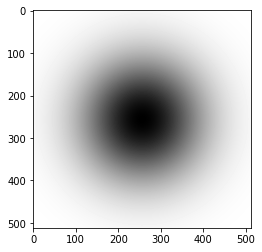

In [42]:
# testando filtro com D_0 = 100
HighPass_GAU = passa_alta_gaussiano(100, image.shape)
plt.imshow(np.abs(HighPass_GAU), "gray")

plt.show()

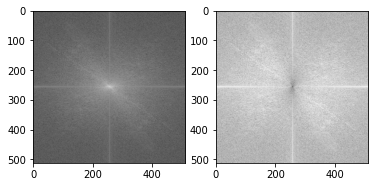

In [43]:
# aplicando filtro em transformada da imagem lenna

HighPassGauCenter = image_fft_shift * HighPass_GAU

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassGauCenter)), cmap="gray")

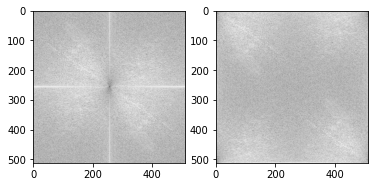

In [44]:
# fazendo o shift inverso com o filtro aplicado na imagem 

HighPassGau_shift_inverse = np.fft.ifftshift(HighPassGauCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassGauCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassGau_shift_inverse)), cmap="gray")

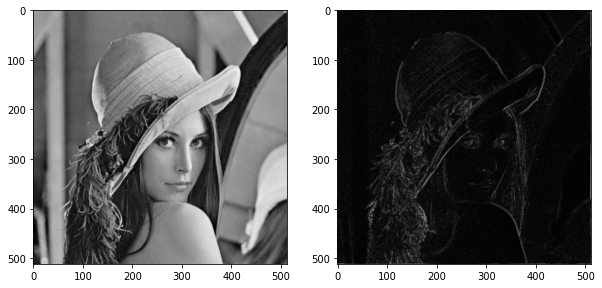

In [45]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_HighPassGau = np.fft.ifft2(HighPassGau_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPassGau), cmap="gray")

##### D_0 = 10

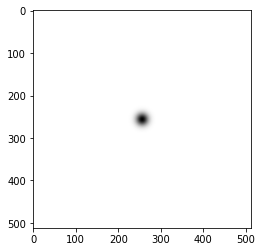

In [46]:
# testando filtro com D_0 = 10
HighPass_GAU = passa_alta_gaussiano(10, image.shape)
plt.imshow(np.abs(HighPass_GAU), "gray")

plt.show()

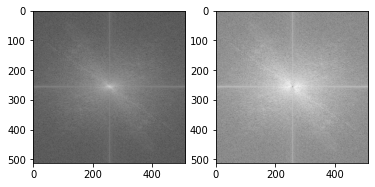

In [47]:
# aplicando filtro em transformada da imagem lenna

HighPassGauCenter = image_fft_shift * HighPass_GAU

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassGauCenter)), cmap="gray")

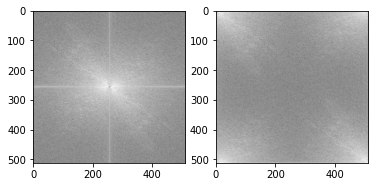

In [48]:
# fazendo o shift inverso com o filtro aplicado na imagem 

HighPassGau_shift_inverse = np.fft.ifftshift(HighPassGauCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassGauCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassGau_shift_inverse)), cmap="gray")

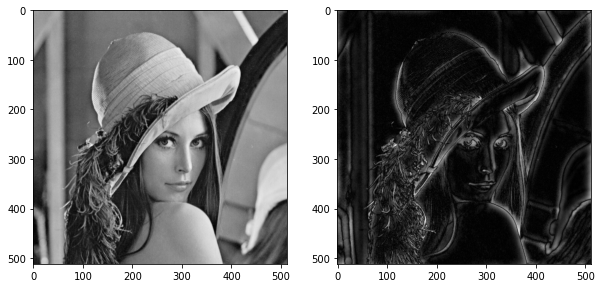

In [49]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_HighPassGau = np.fft.ifft2(HighPassGau_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPassGau), cmap="gray")

#### Conclusões

* Imagem de centro borrada nos 3 testes
* Borda de centro vai de preto para branco gradualmente
* Tamanho do centro é aumentado pro conta do processo de alteração da cor demorada
* Filtro Passa Alta Gaussiano pode ser usado para binarização, utilizando a variável D_0 para evitar a perca de detalhes

### Filtro passa baixa Gaussiano

In [20]:
# Filtro passa baixa Gaussiano

def passa_baixa_gaussiano(D_0, imgageShape):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.e**((-(distance((y,x), center)**2))/(2*(D_0**2)))
    return base


#### Testando filtro

##### D_0 = 50

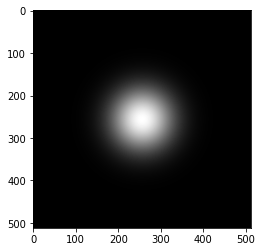

In [29]:
# testando filtro com D_0 = 50
LowPass_GAU = passa_baixa_gaussiano(50, image.shape)
plt.imshow(np.abs(LowPass_GAU), "gray")

plt.show()

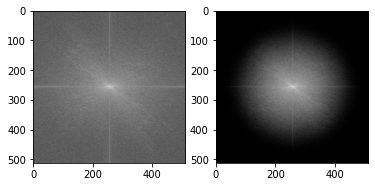

In [30]:
# aplicando filtro em transformada da imagem lenna

LowPassGauCenter = image_fft_shift * LowPass_GAU

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassGauCenter)), cmap="gray")

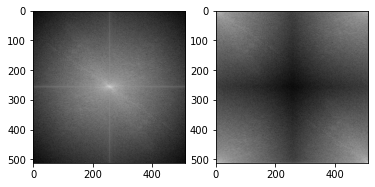

In [37]:
# fazendo o shift inverso com o filtro aplicado na imagem 

LowPassGau_shift_inverse = np.fft.ifftshift(LowPassGauCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPassGauCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassGau_shift_inverse)), cmap="gray")

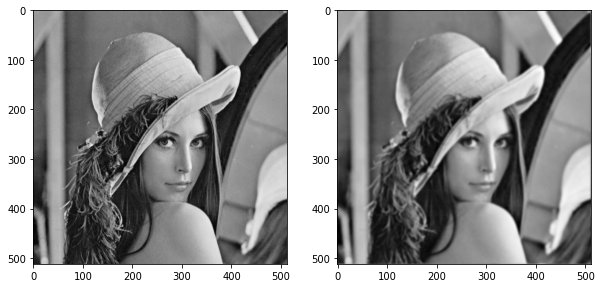

In [32]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_LowPassGau = np.fft.ifft2(LowPassGau_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPassGau), cmap="gray")

##### D_0 = 100

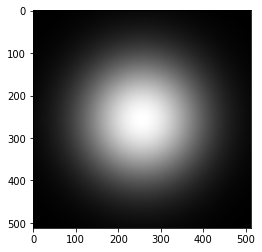

In [54]:
# testando filtro com D_0 = 100
LowPass_GAU = passa_baixa_gaussiano(100, image.shape)
plt.imshow(np.abs(LowPass_GAU), "gray")

plt.show()

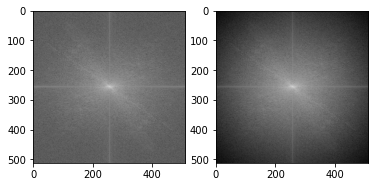

In [55]:
# aplicando filtro em transformada da imagem lenna

LowPassGauCenter = image_fft_shift * LowPass_GAU

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassGauCenter)), cmap="gray")

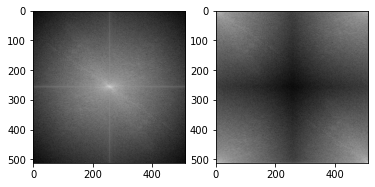

In [56]:
# fazendo o shift inverso com o filtro aplicado na imagem 

LowPassGau_shift_inverse = np.fft.ifftshift(LowPassGauCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPassGauCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassGau_shift_inverse)), cmap="gray")

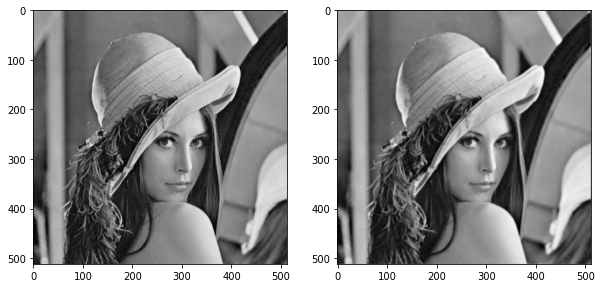

In [57]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_LowPassGau = np.fft.ifft2(LowPassGau_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPassGau), cmap="gray")

##### D_0 = 10

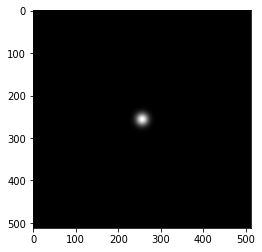

In [58]:
# testando filtro com D_0 = 10
LowPass_GAU = passa_baixa_gaussiano(10, image.shape)
plt.imshow(np.abs(LowPass_GAU), "gray")

plt.show()

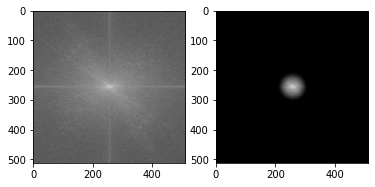

In [59]:
# aplicando filtro em transformada da imagem lenna

LowPassGauCenter = image_fft_shift * LowPass_GAU

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassGauCenter)), cmap="gray")

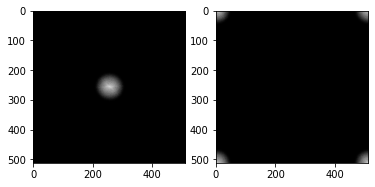

In [60]:
# fazendo o shift inverso com o filtro aplicado na imagem 

LowPassGau_shift_inverse = np.fft.ifftshift(LowPassGauCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPassGauCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassGau_shift_inverse)), cmap="gray")

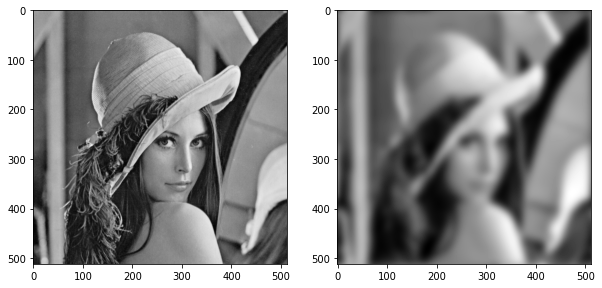

In [61]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_LowPassGau = np.fft.ifft2(LowPassGau_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPassGau), cmap="gray")

#### Conclusões

* Imagem de centro borrada nos 3 testes
* Borda de centro vai de branco para preto gradualmente
* Tamanho do centro é aumentado pro conta do processo de alteração da cor demorada
* Trabalha com suavização da imagem
* Quanto menor o D_0, mais borrada a imagem fica

### Filtro passa alta ideal

In [63]:
# Filtro passa alta ideal

def passa_alta_ideal(D_0, imageShape):
    base = np.zeros(imageShape[:2])
    rows, cols = imageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
              base[y,x] = 0 if distance((y,x), center) <= D_0 else 1
    return base

#### Testando filtro

##### D_0 = 50

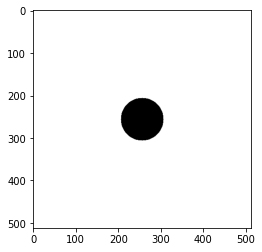

In [64]:
# testando filtro com D_0 = 50
HighPass_ID = passa_alta_ideal(50, image.shape)
plt.imshow(np.abs(HighPass_ID), "gray")

plt.show()

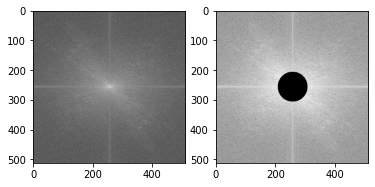

In [66]:
# aplicando filtro em transformada da imagem lenna

HighPassIdealCenter = image_fft_shift * HighPass_ID

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassIdealCenter)), cmap="gray")

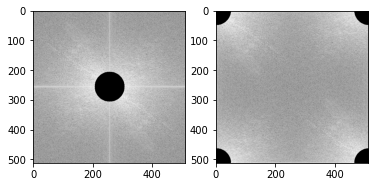

In [67]:
# fazendo o shift inverso com o filtro aplicado na imagem 

HighPassIdeal_shift_inverse = np.fft.ifftshift(HighPassIdealCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassIdealCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassIdeal_shift_inverse)), cmap="gray")

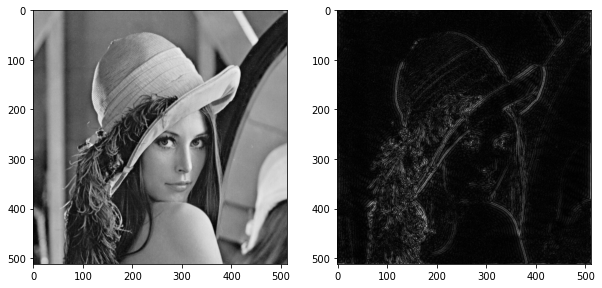

In [68]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_HighPassIdeal = np.fft.ifft2(HighPassIdeal_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPassIdeal), cmap="gray")

##### D_0 = 100

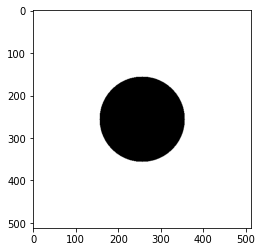

In [69]:
# testando filtro com D_0 = 100
HighPass_ID = passa_alta_ideal(100, image.shape)
plt.imshow(np.abs(HighPass_ID), "gray")

plt.show()

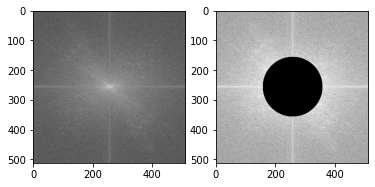

In [70]:
# aplicando filtro em transformada da imagem lenna

HighPassIdealCenter = image_fft_shift * HighPass_ID

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassIdealCenter)), cmap="gray")

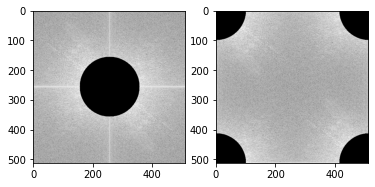

In [71]:
# fazendo o shift inverso com o filtro aplicado na imagem 

HighPassIdeal_shift_inverse = np.fft.ifftshift(HighPassIdealCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassIdealCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassIdeal_shift_inverse)), cmap="gray")

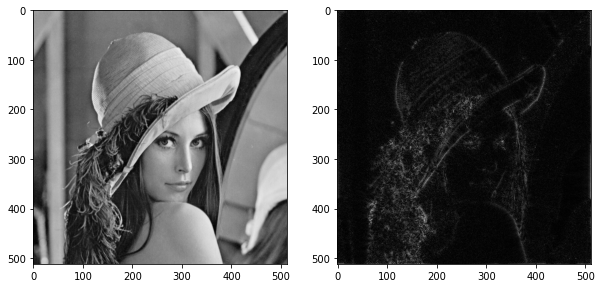

In [72]:
# aplicando Transformada de Fourier Inversa 
# para voltar ao domínio espacial 
# observe que o filtro passa alta gaussiano está sendo aplicado na imgagem

inverse_HighPassIdeal = np.fft.ifft2(HighPassIdeal_shift_inverse)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPassIdeal), cmap="gray")

##### D_0 = 10

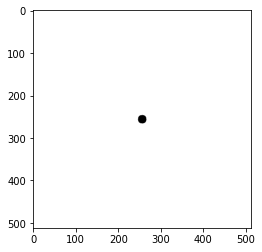

In [ ]:
# testando filtro com D_0 = 10
HighPass_ID = passa_alta_ideal(10, image.shape)
plt.imshow(np.abs(HighPass_ID), "gray")

plt.show()

#### Conclusões

* Imagem de centro não está borrada (como nos filtros gaussianos)
* Borda de centro vai de preto para branco de forma imediata
* Como a mudança de cor é imediata, tamanho de centro é menor que filtros gaussianos

###  Filtro passa-alta ButterWorth

In [ ]:
# Filtro passa-alta ButterWorth

def passa_alta_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - (1/(1+(distance((y,x),center)/D_0)**(2*n)))
    return base

#### Testando filtro

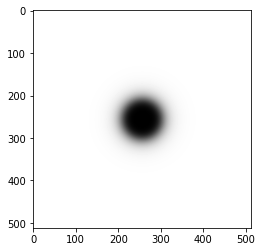

In [ ]:
# testando filtro com D_0 = 50
HighPass_BW = passa_alta_butterworth(50, image.shape, 3)
plt.imshow(np.abs(HighPass_BW), "gray")

plt.show()

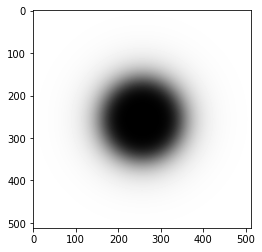

In [ ]:
# testando filtro com D_0 = 100
HighPass_BW = passa_alta_butterworth(100, image.shape, 3)
plt.imshow(np.abs(HighPass_BW), "gray")

plt.show()

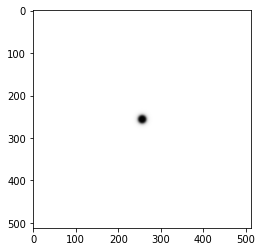

In [ ]:
# testando filtro com D_0 = 10
HighPass_BW = passa_alta_butterworth(10, image.shape, 3)
plt.imshow(np.abs(HighPass_BW), "gray")

plt.show()

#### Conclusões

* Imagem de centro está borrada, porém em uma intensidade menor que o borrão causado por filtros gaussianos
* Borda de centro vai de preto para branco de forma gradativa
* Tamanho de centro levemente aumentado em comparação aos filtros passa alta e passa baixa normais